### 군집 평가 - 실루엣 분석

#### 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게

* 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냅니다.
* 실루엣 분석은 개별 데이터가 가지는 군집화 지표인 실루엣 계수(silhouette coefficient)를 기반으로 합니다.
* 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표입니다.

### 실루엣 계수(Silhouette Coefficent)



* $ s(i) = \frac{(b(i) - a(i))}{(max(a(i), b(i) ))}  $

    * Max( a(i), b(i) )값으로 나눈 이유는 ( b(i) - a(i) )값을 정규화하기 위함
    * 실루엣 계수는 -1에서 1 사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는것이고 0에 가까울수록 근처의 군집과 가까워진다는 것입니다. -값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻합니다.

### 사이킷런 실루엣 분석 API와 좋은 군집 기준

1. 사이킷런 실루엣 분석 API
    * sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', \*\*kwds) : 인자로 X-feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 반환합니다.
    * sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, \*\*kwds) : 인자로 X-feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣계수 값을 평균해 반환합니다. 즉, np.mean(silhouette_samples())입니다. 일반적으로 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있습니다. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 됐다고 판단할 수는 없습니다.
2. 실루엣 분석에 기반한 좋은 군집 기준
    * 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score()값은 0~1사이의 값을 가지며, 1에 가까울수록 좋습니다.
    * 하지만 전체 실루엣 계수의 평균값과 **더불어 개별 군집의 평균값의 편차가 크지 않아야 합니다.** 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요합니다. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아닙니다.

---

## 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [4]:
# iris의 모든 개별 데이터에 실루엣 계수값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

silhouette_samples() return 값의 shape (150,)


In [6]:
irisDF.head(20)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


In [7]:
# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score : {0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score : 0.553


cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

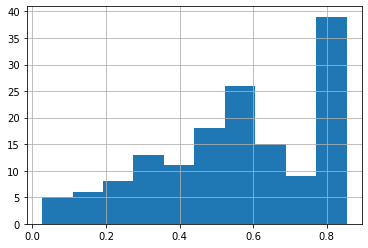

In [8]:
irisDF['silhouette_coeff'].hist()
irisDF.groupby('cluster')['silhouette_coeff'].mean()